In [1]:
# Importing in each cell because of the kernel restarts.
import scrapy
from scrapy.crawler import CrawlerProcess


class ESSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "ESS"
    
    # URL(s) to start with.
    start_urls = [
        'https://www.imdb.com/list/ls045252260/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=c1b9c916-c897-45a2-b228-0013b5e4ff8d&pf_rd_r=752GF7Y1XJBN4NFN3AJV&pf_rd_s=right-1&pf_rd_t=60601&pf_rd_i=best-of.top-movies-of-2018&ref_=ls_bo16_lk10',
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        
        # Iterate over every <article> element on the page.
        for posting in response.xpath('//div[@class="lister-item mode-detail"]'):
           
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                #'title': posting.xpath('h3[@class="lister-item-header"]/a/href)').extract_first()
               # 'title': posting.xpath('//div/h3/a/text()').extract_first()
                #'title': posting.xpath('//div/h3/a/text()').extract_first()
                'name': posting.xpath('div[@class="lister-item-content"]/h3/a/text()').extract_first(),
                'year':posting.xpath('div/h3/span[@class="lister-item-year text-muted unbold"]/text()').extract_first(),
                'rating':posting.xpath('div/div/div/span[@class="ipl-rating-star__rating"]/text()').extract_first(),
                'genre':posting.xpath('div/p/span[@class="genre"]/text()').extract_first()
                 #'title': posting.xpath('/h3/a[@class="lister-item-header"]/text()').extract_first()
                #'date': posting.xpath('time[@class="reult-date"]/text()').extract_first(),
                #'price': posting.xpath('span/span[@class="result-priceiv"]/text()').extract_first()
                 }
        
        # scrape all pages
        #next_page_relative_url = response.xpath('//a[@class="button next"]/@href').extract_first()
        #next_page_absolute_url = response.urljoin(next_page_relative_url)
        

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'imdb.json',  # Name our storage file.
    'ROBOTSTXT_OBEY': True,
    'USER_AGENT': 'ThinkfulDataScienceBootcamp_Rodolfo (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(ESSpider)
process.start()
print('Success!')

Success!


In [87]:
import pandas as pd

imdb = pd.read_json('imdb.json', orient='records')
print(imdb.head())

                                        genre                    name  rating  \
0    \nAction, Adventure, Fantasy              Avengers: Infinity War     8.5   
1       \nBiography, Drama, Music                   Bohemian Rhapsody     8.1   
2         \nDrama, Music, Romance                      A Star Is Born     7.8   
3  \nAnimation, Adventure, Comedy                        Isle of Dogs     7.9   
4                \nDrama, Romance                Call Me by Your Name     7.9   

     year  
0  (2018)  
1  (2018)  
2  (2018)  
3  (2018)  
4  (2017)  


In [88]:
import re
imdb['genre'] = imdb['genre'].map(lambda x: re.sub(r'\n', '', x))
imdb['year'] = imdb.year.str.replace(r"[({'III:)]", "")



In [89]:
imdb.head()

,genre,name,rating,year
0,"Action, Adventure, Fantasy",Avengers: Infinity War,8.5,2018
1,"Biography, Drama, Music",Bohemian Rhapsody,8.1,2018
2,"Drama, Music, Romance",A Star Is Born,7.8,2018
3,"Animation, Adventure, Comedy",Isle of Dogs,7.9,2018
4,"Drama, Romance",Call Me by Your Name,7.9,2017


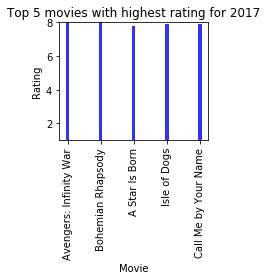

In [95]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
top5=imdb.head()
bar_width = 0.1

opacity = 0.8
bar1= plt.bar( top5.name,top5.rating, bar_width,

                 alpha=opacity,

                 color='b'

                 )

plt.xlabel('Movie')
plt.xticks(rotation = 90)
plt.ylabel('Rating')
plt.ylim(1,8)

#plt.legend()

plt.title('Top 5 movies with highest rating for 2017')

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'IMDB rating')

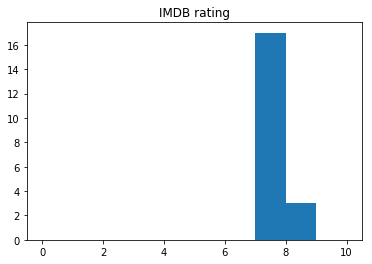

In [100]:
plt.hist(imdb['rating'], bins = 10, range = (0,10)) # bin range = 1
plt.title('IMDB rating')
